<a href="https://colab.research.google.com/github/AbhinavMekala/ML_F_PES2UG23CS338_MB-ABHINAV/blob/main/Week%207/PES2UG23CS338_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Lab Week 10: SVM Classifier Lab**

**Objective:** The goal of this lab is to understand and implement Support Vector Machine (SVM) classifiers. You will train SVMs using three different kernels: **Linear, Radial Basis Function (RBF), and Polynomial**, on distinct datasets. You will then evaluate their performance using standard classification metrics and visualize their decision boundaries to see how they separate data.

## **Core Concepts**
**Support Vector Machine (SVM):** A powerful supervised learning algorithm that finds an optimal hyperplane to separate data points of different classes.

**Kernel Trick:** A technique that allows SVMs to solve non-linear problems by transforming data into a higher-dimensional space.

- Linear Kernel: Creates a straight-line decision boundary.

- RBF Kernel: Creates a complex, non-linear boundary, like a circle or a wave.

- Polynomial Kernel: Creates a curved, polynomial decision boundary.



---



## 1. Setup and Imports
First, let's import the necessary libraries.

In [1]:
# Core libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all plots
sns.set_style("whitegrid")



---



## 2. Helper Function for Visualization
This helper function plots the decision boundaries for our trained models. It will work for all our datasets

In [2]:
def plot_decision_boundaries(X, y, model, title):
    """
    Visualizes the decision boundaries of a trained classifier.
    (Corrected version)
    """
    # Create a meshgrid to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

    # Get unique labels and ensure they are a list for the legend function
    unique_labels = np.unique(y)
    if len(unique_labels) == 2:
        legend_labels = ['Class 0', 'Class 1']
    else:
        legend_labels = list(unique_labels.astype(str)) # Convert numpy array to a list

    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
    plt.show()



---



## 3. Experiments

# **PART 1**

## Dataset 1: The Moons Dataset
The Moons dataset is a synthetic dataset designed to test non-linear classification algorithms. The data points are shaped like two interlocking half-moons.

### Step 1.1: Generate and Prepare the Data
We will generate the data using scikit-learn and apply feature scaling.

In [3]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Scale the features
# Feature scaling is crucial for SVMs to perform optimally.
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

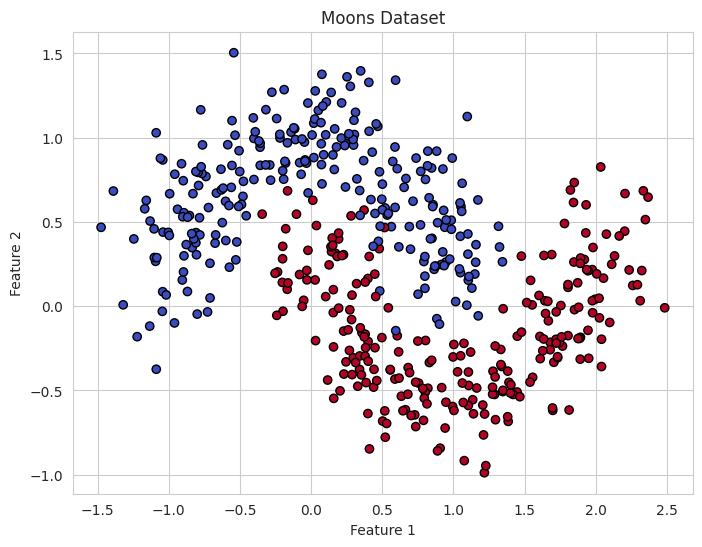

In [4]:
# Visualize the Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()

### Step 1.2: Train and Evaluate SVM Kernels

In [5]:
kernels = ['linear', 'rbf', 'poly']
models_moons = {}

for kernel in kernels:
    # TODO: Initialize SVM with the current kernel
    svm_model = SVC(kernel=kernel, C=1, random_state=42)

    # TODO: Train the model
    svm_model.fit(X_train_moons_scaled, y_train_moons)

    # Store the trained model
    models_moons[kernel] = svm_model

    # TODO: Make predictions
    y_pred_moons = svm_model.predict(X_test_moons_scaled)

    # TODO: Replace with your SRN
    print(f"SVM with {kernel.upper()} Kernel <PES2UG23CS338>")
    print(classification_report(y_test_moons, y_pred_moons))
    print("-" * 40 + "\n")

SVM with LINEAR Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.89      0.84      0.86        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

----------------------------------------

SVM with RBF Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

----------------------------------------

SVM with POLY Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        75
           1       0.94      0.83      0.

### Step 1.3: Visualize Decision Boundaries

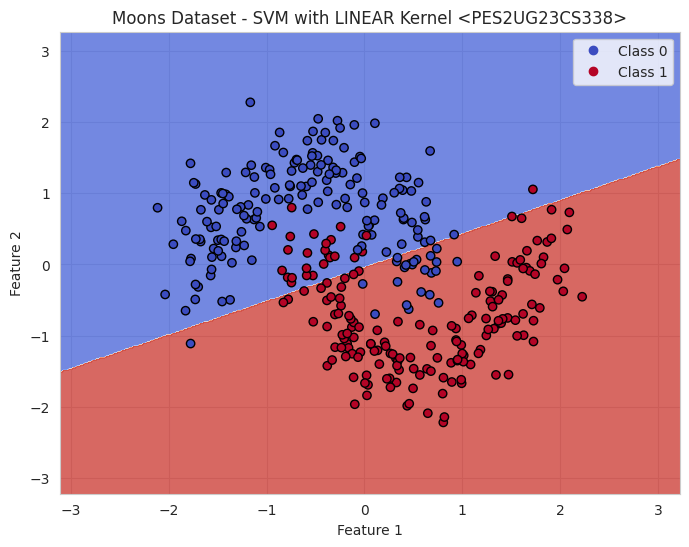

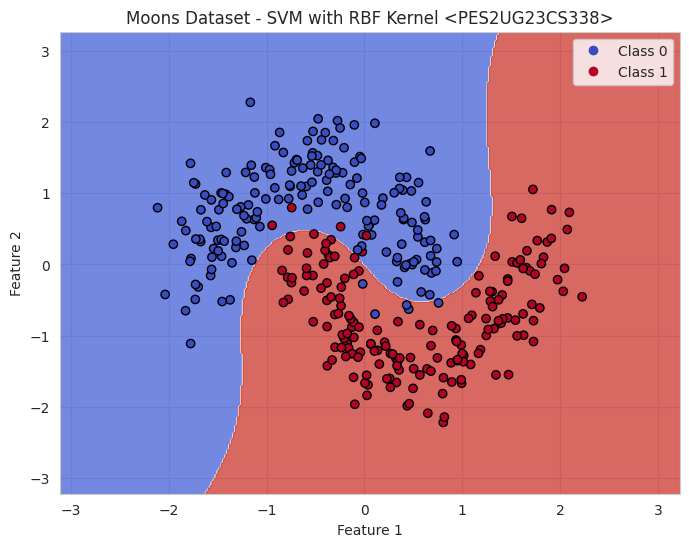

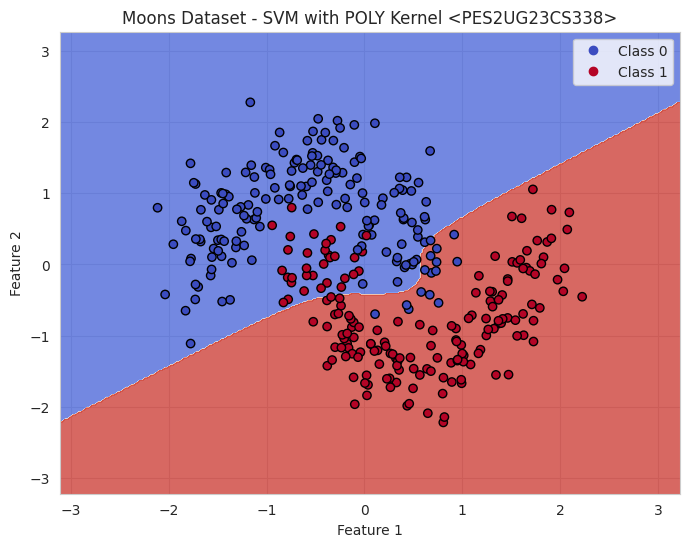

In [6]:
#TODO: Replace with your SRN
for kernel, model in models_moons.items():
    plot_decision_boundaries(
        X_train_moons_scaled,
        y_train_moons,
        model,
        title=f'Moons Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS338>'
    )

### Analysis Questions for Moons:

1. Based on the metrics and the visualizations, what inferences about the performance of the Linear Kernel can you draw?

2. Compare the decision boundaries of the RBF and Polynomial kernels. Which one seems to capture the shape of the data more naturally?

# **PART 2**

## Dataset 2: Banknote Authentication
This is a real-world binary classification dataset where the goal is to predict whether a banknote is genuine or forged based on features extracted from a digital image.

### Step 2.1: Load and Prepare the Data
We will load this data from a public URL using pandas. We will use the variance and skewness of the image transform as our features for visualization.

In [7]:
# Load the dataset from a URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
banknote_df = pd.read_csv(url, header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

# Select features and target
X_banknote = banknote_df[['variance', 'skewness']].values
y_banknote = banknote_df['class'].values

# Split data
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = train_test_split(
    X_banknote, y_banknote, test_size=0.3, random_state=42, stratify=y_banknote
)

# Scale features
scaler_banknote = StandardScaler()
X_train_banknote_scaled = scaler_banknote.fit_transform(X_train_banknote)
X_test_banknote_scaled = scaler_banknote.transform(X_test_banknote)

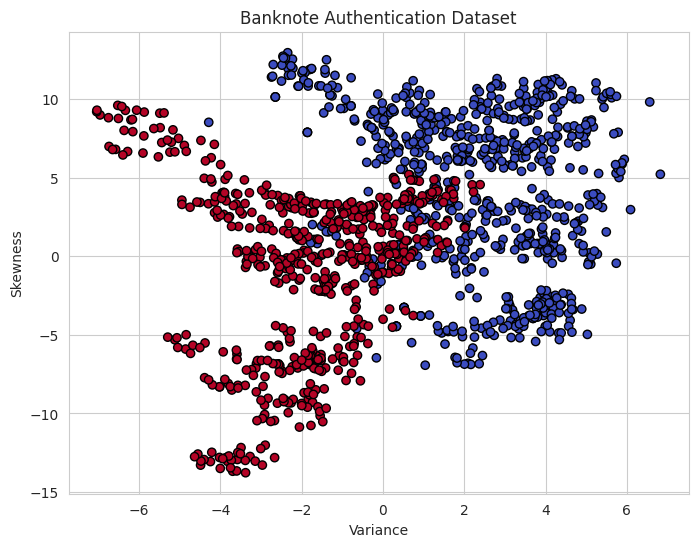

In [8]:
# Visualize the Banknote Authentication dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_banknote[:, 0], X_banknote[:, 1], c=y_banknote, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

### Step 2.2: Train and Evaluate SVM Kernels

In [9]:
models_banknote = {}

for kernel in kernels:
    # TODO: Initialize and train the SVM
    svm_model = SVC(kernel=kernel, C=1, random_state=42)
    svm_model.fit(X_train_banknote_scaled, y_train_banknote)

    # Store the model
    models_banknote[kernel] = svm_model

    # TODO: Make predictions
    y_pred_banknote = svm_model.predict(X_test_banknote_scaled)

    # TODO: Replace with your SRN
    print(f"SVM with {kernel.upper()} Kernel <PES2UG23CS338>")
    print(classification_report(y_test_banknote, y_pred_banknote, target_names=['Forged', 'Genuine']))
    print("-" * 40 + "\n")

SVM with LINEAR Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

      Forged       0.90      0.88      0.89       229
     Genuine       0.86      0.88      0.87       183

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

----------------------------------------

SVM with RBF Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

      Forged       0.96      0.91      0.94       229
     Genuine       0.90      0.96      0.93       183

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412

----------------------------------------

SVM with POLY Kernel <PES2UG23CS338>
              precision    recall  f1-score   support

      Forged       0.82      0.91      0.87       229
     Genuine       0.87      0.75      0.

### Step 2.3: Visualize Decision Boundaries

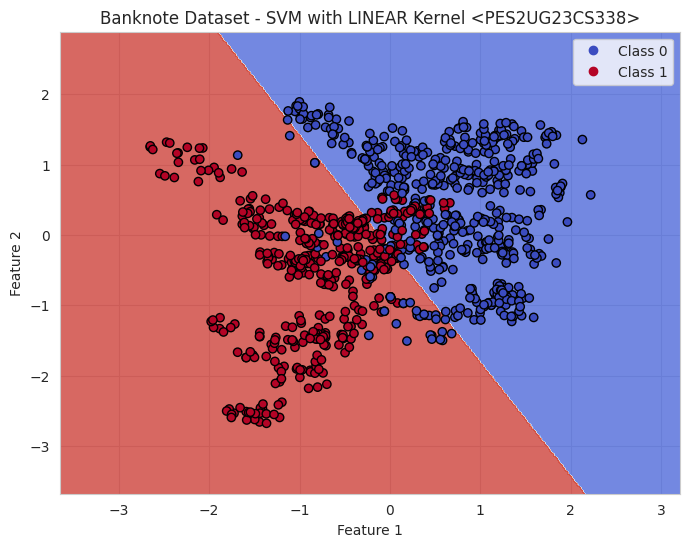

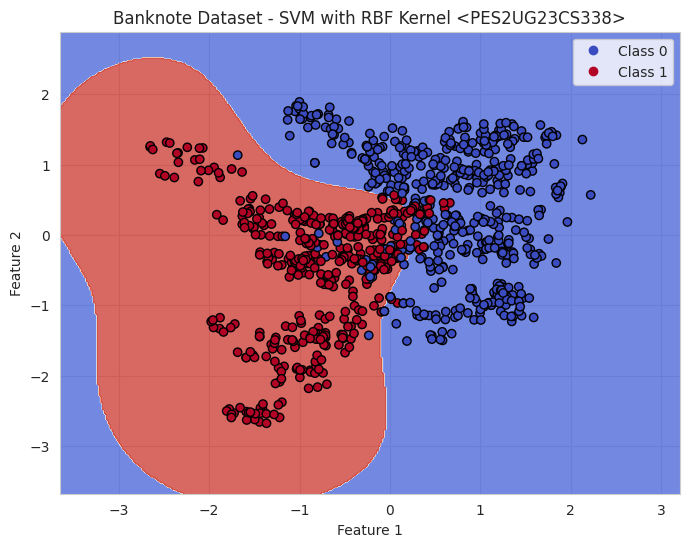

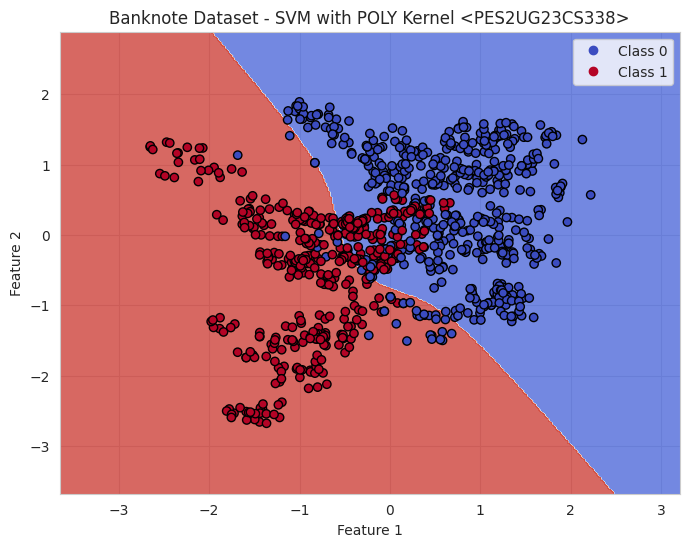

In [10]:
#TODO: Replace with your SRN
for kernel, model in models_banknote.items():
    plot_decision_boundaries(
        X_train_banknote_scaled,
        y_train_banknote,
        model,
        title=f'Banknote Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS338>'
    )

### Analysis Questions for Banknote:
1. In this case, which kernel appears to be the most effective?
2. The Polynomial kernel shows lower performance here compared to the Moons dataset. What might be the reason for this?

---

# **PART 3**

## 4. Understanding the Hard and Soft Margins
Soft Margin (Small C value, e.g., 0.1): A smaller C value creates a "softer" margin, meaning the model is more tolerant of misclassifications. This results in a wider margin and can lead to better generalization, especially with noisy data.

Hard Margin (Large C value, e.g., 100): A larger C value creates a "harder" margin. The model will try to classify every data point correctly, resulting in a narrower margin. This can lead to overfitting if the data has outliers.

Let's create a dataset that is mostly linearly separable but has some noise, which is perfect for understanding the difference between hard and soft margins.

In [11]:
from sklearn.datasets import make_blobs

# Generate linearly separable data with some noise
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Add some outliers
outliers_X = np.array([[0.5, 2.5], [1.5, 0.5]])
outliers_y = np.array([1, 0])
X_linear = np.concatenate([X_linear, outliers_X])
y_linear = np.concatenate([y_linear, outliers_y])


# Split and scale the data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

Now, let's train two SVM models with a linear kernel: one with a small C (soft margin) and one with a large C (hard margin).

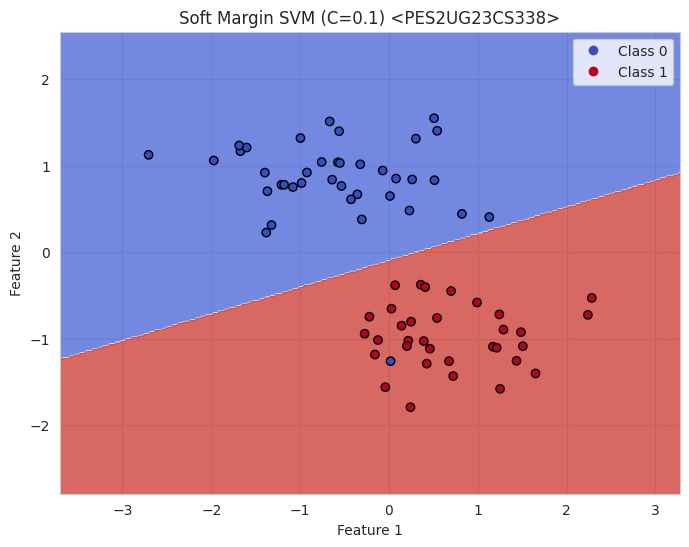

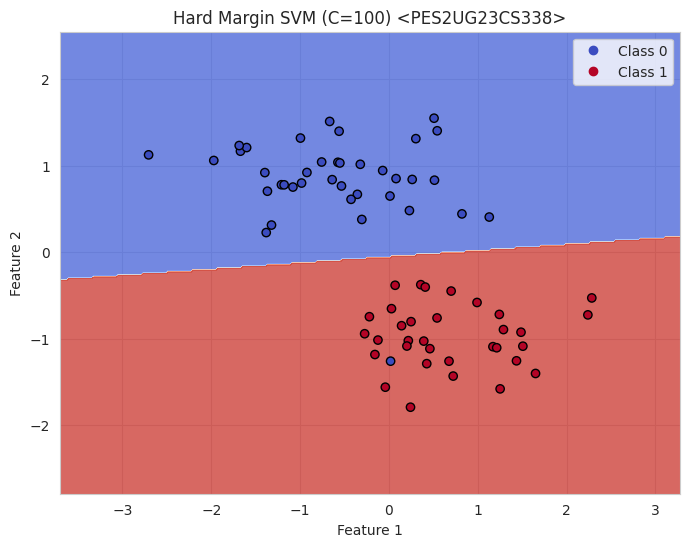

In [12]:
# Soft Margin SVM (small C)
# TODO: Create a linear SVM model with a small C value (e.g., 0.1) for a soft margin.
#          - Set the kernel to 'linear'.
#          - Set C to 0.1.
#          - Set random_state to 42 for consistent results.
svm_soft = SVC(kernel="linear", C=0.1, random_state=42)

# TODO: Fit the soft margin model to the training data (X_train_linear_scaled, y_train_linear).
svm_soft.fit(X_train_linear_scaled, y_train_linear)

# TODO: Replace with your SRN
plot_decision_boundaries(X_train_linear_scaled, y_train_linear, svm_soft, title='Soft Margin SVM (C=0.1) <PES2UG23CS338>')

# Hard Margin SVM (large C)
# TODO: Create a linear SVM model with a large C value (e.g., 100) for a hard margin.
#          - Set the kernel to 'linear'.
#          - Set C to 100.
#          - Set random_state to 42.
svm_hard = SVC(kernel="linear", C=100, random_state=42)

# TODO: Fit the hard margin model to the training data
svm_hard.fit(X_train_linear_scaled, y_train_linear)

# TODO: Replace with your SRN
plot_decision_boundaries(X_train_linear_scaled, y_train_linear, svm_hard, title='Hard Margin SVM (C=100) <PES2UG23CS338>')

### Analysis Questions

1. Compare the two plots. Which model, the "Soft Margin" (C=0.1) or the "Hard Margin" (C=100), produces a wider margin?

2. Look closely at the "Soft Margin" (C=0.1) plot. You'll notice some points are either inside the margin or on the wrong side of the decision boundary. Why does the SVM allow these "mistakes"? What is the primary goal of this model?

3. Which of these two models do you think is more likely to be overfitting to the training data? Explain your reasoning.

4. Imagine you receive a new, unseen data point. Which model do you trust more to classify it correctly? Why? In a real-world scenario where data is often noisy, which value of C (low or high) would you generally prefer to start with?

---

## 5. Lab Summary and Conclusion
In this lab, you have:

- Trained SVM classifiers on three distinct datasets: one synthetic non-linear, one real-world binary, and one high-dimensional multi-class.

- Implemented and compared three common kernels: Linear, RBF, and Polynomial.

- Evaluated model performance using standard classification reports.

- Visualized decision boundaries to understand how each kernel operates on different data distributions.

- Understood hard and soft margins.



---

